## 딥러닝 기초

## MNIST 손글씨 숫자 분류 학습

### 이미지 데이터 불러오기

In [5]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [62]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [63]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

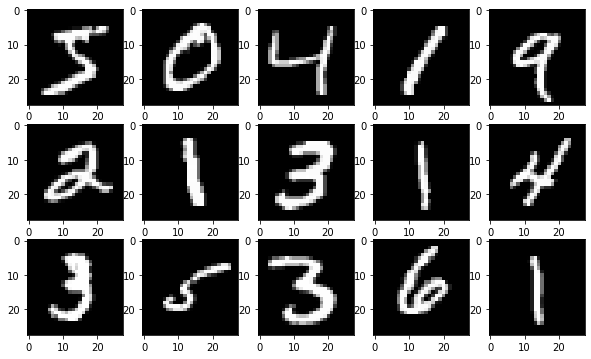

In [25]:
# 불러온 train 데이터 시각화

plt.figure(figsize = (10, 6))

for i in range(15):
    ax = plt.subplot(3, 5, i + 1)
    plt.imshow(train_images[i], axes = ax, cmap = 'gray')

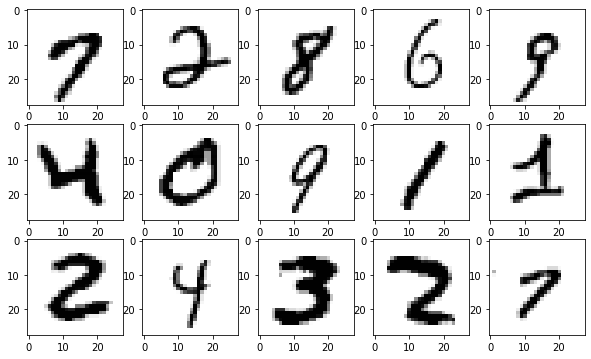

In [66]:
# 불러온 train 데이터 시각화

plt.figure(figsize = (10, 6))

for i in range(15):
    ax = plt.subplot(3, 5, i + 1)
    plt.imshow(train_images[15 + i], cmap = plt.cm.binary)

### 신경망 만들기

In [28]:
from keras import models
from keras import layers

In [29]:
# 신경망 모델 만들기

network = models.Sequential()
network.add(layers.Dense(512, activation = 'relu', input_shape = (28 * 28, )))
network.add(layers.Dense(10, activation = 'softmax'))

In [51]:
# 모델 컴파일 
## 계산 그래프 구성을 마무리하는 과정 수행

network.compile(optimizer = 'rmsprop',   # 최적화 함수
                loss = 'categorical_crossentropy',   # 손실함수
                metrics = ['accuracy'])  # 평가 요소

In [46]:
# train, test 이미지 데이터를 네트워크에 맞는 크기로 바꾸기
## 신경망은 데이터 스케일에 민감하여 적절한 데이터 전처리 과정이 필요함, 이미지의 경우 픽셀 최댓값인 255로 나누어 사용함

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [47]:
from keras.utils import to_categorical

In [48]:
# label 데이터를 네트워크에 맞게 범주형으로 인코딩
## to_categorical(n, k): n은 데이터 개수, k는 label class개수 -> onehot encoding화 시킨것

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [49]:
train_labels.shape

(60000, 10)

### 학습

In [52]:
network.fit(train_images, train_labels,
            epochs = 5,
            batch_size = 128)

Epoch 1/5
469/469 [==============================] - 5s 12ms/step - loss: 0.2565 - accuracy: 0.9256
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.1045 - accuracy: 0.9682
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0690 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0509 - accuracy: 0.9845
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0386 - accuracy: 0.9879


### 평가

In [56]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

round(test_loss, 3), round(test_acc,3)

313/313 [==============================] - 1s 3ms/step - loss: 0.0647 - accuracy: 0.9803


(0.065, 0.98)

- 훈련데이터의 정확도보다 낮게 나와 과대적합에 해당한다고 볼 수 있음

## 실습: 영화 이진 분류 

### 데이터 불러오기

In [67]:
from keras.datasets import imdb

In [71]:
imdb.load_data()

17465344/17464789 [==============================] - 3s 0us/step


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\NEW\anaconda3\envs\cakd7\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\NEW\anaconda3\envs\cakd7\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprec

((array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
         list([1, 19

In [72]:
# num_words: 훈련변수에서 자주 나타나는 단어 10000개를 사용하겠다는 의미

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)
train_data.shape, test_data.shape

((25000,), (25000,))

In [73]:
# 숫자를 문자로 바꿔보기

word_index = imdb.get_word_index()

reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)

## get(i - 3, '?'): 리뷰를 디코딩하는데 0,1,2는 '패딩', '문서 시작', '사전에 없음'을 위한 
## 인덱스이므로 3을 뺌
decoded_review = ' '.join([reverse_word_index.get(i-3, "?") for i in train_data[0]])

1646592/1641221 [==============================] - 0s 0us/step


In [75]:
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [74]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### 데이터 준비

In [80]:
# 리스트를 텐서화하는 방법

## 리스트를 원핫 인코딩하여 0과 1의 벡터로 변환

import numpy as np
def vectorize_sequence(sequences, dimension = 10000):
    # (영화리뷰 개수, 단어 피처 수) zero numpy array 생성
    results = np.zeros((len(sequences), dimension))
    
    # 원핫 인코딩 
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
     
x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

x_train.shape, x_test.shape

((25000, 10000), (25000, 10000))

In [82]:
y_train = train_labels.astype('float32')
y_test = test_labels.astype('float32')

y_train.shape, y_test.shape

((25000,), (25000,))

### 신경망 모델 만들기

In [90]:
from keras import models
from keras import layers
from keras import optimizers, losses, metrics

In [86]:
# 모델 생성
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [91]:
# 모델 컴파일 
##방법 1
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

## 방법2
model.compile(optimizer = optimizers.RMSprop(learning_rate = 0.001),
              loss = losses.binary_crossentropy,
              metrics = [metrics.binary_accuracy])

In [92]:
# 훈련 검증 데이터 나누기
x_train.shape, x_test.shape

((25000, 10000), (25000, 10000))

In [93]:
x_val = x_train[:10000]
part_x_train = x_train[10000:]

y_val = y_train[:10000]
part_y_train = y_train[10000:]

x_val.shape, part_x_train.shape

((10000, 10000), (15000, 10000))

In [97]:
# 모델 훈련시키고 객체화

history = model.fit(part_x_train,     # train x data
                    part_y_train,     # train y data
                    epochs = 20,      # 총 전체 train data 업데이트 횟수
                    batch_size = 512,     # 한 에포크당 가중치 업데이트에 기여할 data batch size
                    validation_data = (x_val, y_val))    # 검증 data

Epoch 1/20
30/30 [==============================] - 6s 199ms/step - loss: 0.5202 - binary_accuracy: 0.7867 - val_loss: 0.3851 - val_binary_accuracy: 0.8719
Epoch 2/20
30/30 [==============================] - 1s 40ms/step - loss: 0.3070 - binary_accuracy: 0.9028 - val_loss: 0.3095 - val_binary_accuracy: 0.8862
Epoch 3/20
30/30 [==============================] - 1s 38ms/step - loss: 0.2296 - binary_accuracy: 0.9259 - val_loss: 0.2842 - val_binary_accuracy: 0.8884
Epoch 4/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1805 - binary_accuracy: 0.9429 - val_loss: 0.2766 - val_binary_accuracy: 0.8892
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1486 - binary_accuracy: 0.9539 - val_loss: 0.2793 - val_binary_accuracy: 0.8880
Epoch 6/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1235 - binary_accuracy: 0.9610 - val_loss: 0.2914 - val_binary_accuracy: 0.8848
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - lo

In [100]:
# model.fit()은 history 객체를 반환
# 이 객체는 훈련하는 동안 발생한 모든 정보를 담고 있는 딕셔너리인 history 속성을 가짐
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

In [102]:
history_dict['loss']

[0.5202084183692932,
 0.3069603741168976,
 0.22964105010032654,
 0.18047448992729187,
 0.14859646558761597,
 0.12347942590713501,
 0.10288814455270767,
 0.08422879129648209,
 0.07002594321966171,
 0.06000831350684166,
 0.04611489549279213,
 0.04051874205470085,
 0.030916066840291023,
 0.0255513284355402,
 0.020255982875823975,
 0.01673959381878376,
 0.011028888635337353,
 0.012070981785655022,
 0.006007182411849499,
 0.007163589354604483]

### 시각화

In [103]:
import matplotlib.pyplot as plt

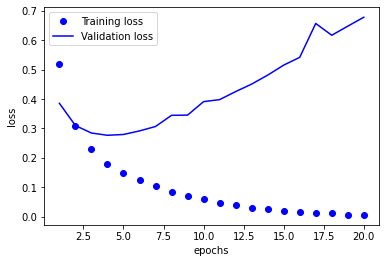

In [105]:
# 훈련/검증 손실 시각화

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, 21)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

- 훈련 손실이 에포크마다 감소하고 있으나, 검증 손실은 오히려 에포크 2-3번만에 올라감
- 훈련 데이터에 과대적합된 현상이 보임

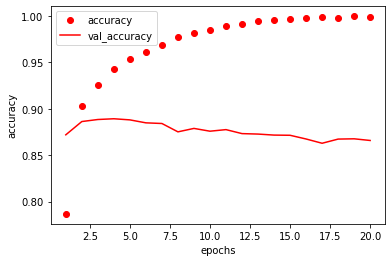

In [106]:
# 훈련/검증 정확도 시각화

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']

plt.plot(epochs, acc, 'ro', label = 'accuracy')
plt.plot(epochs, val_acc, 'r', label = 'val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

- 역시, 훈련데이터의 정확도는 점점 증가 추세이지만, 검증데이터의 정확도는 올라가다가 점차 내려가는 추세
- 과대적합되어 있음

- 이러한 경우 과대적합을 방지하기 위해 세번째 에포크 이후에 훈련을 중지하도록 설정하 룻 있음

In [109]:
# 모델 생성
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

# 모델 컴파일
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

# 학습
model.fit(part_x_train, 
          part_y_train,
          epochs = 4, 
          batch_size = 512)

# 테스트
model.evaluate(x_test, y_test)

Epoch 1/4
30/30 [==============================] - 1s 26ms/step - loss: 0.5171 - acc: 0.7811
Epoch 2/4
30/30 [==============================] - 1s 30ms/step - loss: 0.3048 - acc: 0.9049
Epoch 3/4
30/30 [==============================] - 1s 23ms/step - loss: 0.2253 - acc: 0.9280
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.2993 - acc: 0.8783


[0.29929104447364807, 0.8783199787139893]

In [111]:
# 예측
preds = model.predict(x_test)

print(preds.shape)

## 출력 은닉층에 sigmoid 활성화함수를 사용했기 때문에 확률형태로 나옴
print(preds[:10])

(25000, 1)
[[0.2380122 ]
 [0.9988712 ]
 [0.87459767]
 [0.55655813]
 [0.88075125]
 [0.7588532 ]
 [0.98571837]
 [0.02364695]
 [0.9316863 ]
 [0.98493123]]


In [112]:
# 실제값
y_test[:10]

array([0., 1., 1., 0., 1., 1., 1., 0., 0., 1.], dtype=float32)

- 비교해보면 4번째 실제값이 0인데 0.55로 예측됨

## 실습: 뉴스 기사 다중 분류

### 데이터 불러오기

In [116]:
from keras.datasets import reuters
import warnings
warnings.filterwarnings('ignore')

In [117]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)
train_data.shape, test_data.shape

((8982,), (2246,))

In [121]:
print(train_data[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [124]:
# 피처를 정수에서 문자로 바꾸기

word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

In [125]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [129]:
print(set(train_labels))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45}


### 데이터 준비

In [157]:
import numpy as np

def vectorize_sequence(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [158]:
x_train.shape, x_test.shape

((8982, 10000), (2246, 10000))

In [159]:
# label 데이터 준비

## 방법1: 직접 사용자함수 만들기
def one_hot_encoding(labels, dimension = 46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

y_train = one_hot_encoding(train_labels, dimension = 46)
y_test = one_hot_encoding(test_labels, dimension = 46)

In [160]:
y_train.shape, y_test.shape

((8982, 46), (2246, 46))

In [161]:
## 방법2: to_categorical 함수 활용
from keras.utils.np_utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [162]:
y_train.shape, y_test.shape

((8982, 46), (2246, 46))

In [192]:
## 방법3: 정수 텐서로 변환  -> 모델 컴파일 시, loss 만 'sparse_categorical_crossentropy'로 수정하면 됨

y_train_v2 = np.array(train_labels)
y_test_v2 = np.array(test_labels)

y_train_v2.shape, y_test_v2.shape

((8982,), (2246,))

In [194]:
train_labels.shape, test_labels.shape

((8982,), (2246,))

### 모델 구성
- 출력 클래스가 46개로 늘어나면서 출력 공간의 차원이 훨씬 커짐
- 이전에 영화 이진 분류에서 활용한 16차원 출력의 dense 층을 쌓으면 각 층은 이전 층의 출력에서 제공한 정보만 사용할 수 있음
- 한 층이 분류 문제에 필요한 일부 정보를 누락하면 그다음 층에서 복구할 수가 없어 잠재적으로 정보의 병목이 됨
- 따라서 은닉 유닛이 좀 더 큰 dense 층을 활용하도록함

In [163]:
from keras import models, layers

In [164]:
# 모델 생성
model = models.Sequential()

model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

In [165]:
from keras import optimizers, losses, metrics

In [166]:
# 모델 컴파일
model.compile(optimizer = optimizers.RMSprop(),
              loss = losses.categorical_crossentropy,
              metrics = metrics.categorical_accuracy)

In [167]:
# 훈련 검증

x_val = x_train[:1000]
x_train_part = x_train[1000:]

y_val = y_train[:1000]
y_train_part = y_train[1000:]

x_val.shape, x_train_part.shape

((1000, 10000), (7982, 10000))

In [168]:
# 훈련

history = model.fit(x_train_part, y_train_part,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 99ms/step - loss: 2.6359 - categorical_accuracy: 0.5281 - val_loss: 1.7818 - val_categorical_accuracy: 0.6430
Epoch 2/20
16/16 [==============================] - 1s 50ms/step - loss: 1.4409 - categorical_accuracy: 0.7115 - val_loss: 1.3073 - val_categorical_accuracy: 0.7200
Epoch 3/20
16/16 [==============================] - 1s 70ms/step - loss: 1.0567 - categorical_accuracy: 0.7796 - val_loss: 1.1318 - val_categorical_accuracy: 0.7520
Epoch 4/20
16/16 [==============================] - 1s 57ms/step - loss: 0.8347 - categorical_accuracy: 0.8249 - val_loss: 1.0302 - val_categorical_accuracy: 0.7860
Epoch 5/20
16/16 [==============================] - 1s 64ms/step - loss: 0.6636 - categorical_accuracy: 0.8612 - val_loss: 0.9641 - val_categorical_accuracy: 0.8020
Epoch 6/20
16/16 [==============================] - 1s 63ms/step - loss: 0.5311 - categorical_accuracy: 0.8901 - val_loss: 0.9731 - val_categorical_accuracy: 0.7830
Epoch 7/20

In [169]:
history.history.keys()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

### 시각화

In [170]:
import matplotlib.pyplot as plt

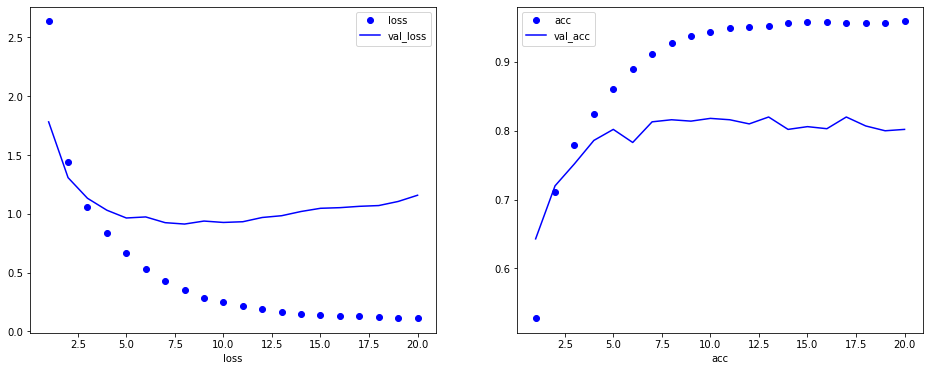

In [176]:
# 시각화

loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

epochs = range(1,21)
y_1 = ['loss', 'acc']
y_2 = ['val_loss', 'val_acc']

plt.figure(figsize = (16, 6))
for i in range(2):
    ax = plt.subplot(1, 2, i + 1)
    plt.plot(epochs, eval(y_1[i]), 'bo', label = y_1[i])
    plt.plot(epochs, eval(y_2[i]), 'b', label = y_2[i])
    plt.xlabel(y_1[i])
    plt.legend()
plt.show()  

- 손실값은 훈련데이터에서 계속 낮아지는 경향이 있으나 검증 데이터에서는 5번째 이후에 더이상 낮아지지 않음
- 정확도는 역시 훈련데이터에서 계속 높아지는 경향이 있으나, 검증 데이터에서 5번쩨 이후 한번 낮아지더니 유지하다가 9~10번째 이후 더 나아지지 않음 
<br>
<br>

- 따라서, 훈련 데이터에 과대적합되어 있다고 볼 수 있음

In [180]:
# 테스트 

model.compile(optimizer = optimizers.RMSprop(learning_rate = 0.01),
              loss = losses.categorical_crossentropy,
              metrics = ['acc'])

model.fit(x_train_part, y_train_part,
          epochs = 9,
          batch_size = 512,
          validation_data = (x_val, y_val))

results = model.evaluate(x_test, y_test)
results

Epoch 1/9
16/16 [==============================] - 2s 94ms/step - loss: 2.5030 - acc: 0.8186 - val_loss: 1.0603 - val_acc: 0.7960
Epoch 2/9
16/16 [==============================] - 1s 54ms/step - loss: 0.2046 - acc: 0.9508 - val_loss: 1.1199 - val_acc: 0.7840
Epoch 3/9
16/16 [==============================] - 1s 57ms/step - loss: 0.2396 - acc: 0.9379 - val_loss: 1.2626 - val_acc: 0.7680
Epoch 4/9
16/16 [==============================] - 1s 61ms/step - loss: 0.1685 - acc: 0.9513 - val_loss: 1.1867 - val_acc: 0.7940
Epoch 5/9
16/16 [==============================] - 1s 58ms/step - loss: 0.1647 - acc: 0.9510 - val_loss: 1.2578 - val_acc: 0.7820
Epoch 6/9
16/16 [==============================] - 1s 53ms/step - loss: 0.3299 - acc: 0.9189 - val_loss: 1.1816 - val_acc: 0.7980
Epoch 7/9
16/16 [==============================] - 1s 56ms/step - loss: 0.1170 - acc: 0.9583 - val_loss: 1.1647 - val_acc: 0.8020
Epoch 8/9
16/16 [==============================] - 1s 65ms/step - loss: 0.1110 - acc: 0.95

[1.6122967004776, 0.7764915227890015]

In [184]:
predictions = model.predict(x_test)
np.round(predictions, 3)

array([[0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.004, 0.503, 0.   , ..., 0.001, 0.   , 0.   ],
       [0.   , 0.997, 0.   , ..., 0.   , 0.   , 0.   ],
       ...,
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.029, 0.017, 0.002, ..., 0.001, 0.   , 0.   ],
       [0.   , 0.985, 0.   , ..., 0.   , 0.   , 0.   ]], dtype=float32)

In [191]:
predictions.sum(axis = 1)

array([1.        , 0.99999994, 1.        , ..., 1.0000001 , 0.99999994,
       0.9999999 ], dtype=float32)

In [187]:
pred = model.predict(x_test[:2])
np.round(pred, 3)

array([[0.   , 0.   , 0.   , 0.859, 0.005, 0.   , 0.   , 0.   , 0.007,
        0.   , 0.   , 0.002, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.121, 0.003, 0.002, 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.004, 0.503, 0.   , 0.002, 0.038, 0.   , 0.   , 0.   , 0.   ,
        0.001, 0.24 , 0.002, 0.006, 0.   , 0.   , 0.   , 0.009, 0.   ,
        0.002, 0.016, 0.   , 0.   , 0.013, 0.   , 0.   , 0.002, 0.   ,
        0.   , 0.005, 0.009, 0.002, 0.   , 0.   , 0.   , 0.004, 0.   ,
        0.034, 0.   , 0.052, 0.   , 0.   , 0.025, 0.026, 0.001, 0.   ,
        0.   ]], dtype=float32)

In [189]:
y_test[:2]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)

In [202]:
# 정수 텐서로 변환했던 레이블로 모델 훈련
# 레이블 데이터 준비
y_val = train_labels[:1000]
y_train_v2 = train_labels[1000:]

# 모델 생성
model = models.Sequential()

model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

# 모델 컴파일
model.compile(optimizer = 'rmsprop',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

# 훈련
history = model.fit(x_train_part, y_train_v2,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))


Epoch 1/20
16/16 [==============================] - 1s 92ms/step - loss: 2.5460 - acc: 0.4821 - val_loss: 1.6525 - val_acc: 0.6490
Epoch 2/20
16/16 [==============================] - 1s 63ms/step - loss: 1.3781 - acc: 0.7217 - val_loss: 1.2723 - val_acc: 0.7220
Epoch 3/20
16/16 [==============================] - 1s 52ms/step - loss: 1.0230 - acc: 0.7873 - val_loss: 1.1014 - val_acc: 0.7670
Epoch 4/20
16/16 [==============================] - 1s 55ms/step - loss: 0.7990 - acc: 0.8281 - val_loss: 1.0394 - val_acc: 0.7710
Epoch 5/20
16/16 [==============================] - 1s 57ms/step - loss: 0.6339 - acc: 0.8677 - val_loss: 0.9494 - val_acc: 0.7990
Epoch 6/20
16/16 [==============================] - 1s 67ms/step - loss: 0.5034 - acc: 0.8953 - val_loss: 0.9283 - val_acc: 0.8060
Epoch 7/20
16/16 [==============================] - 1s 62ms/step - loss: 0.4093 - acc: 0.9168 - val_loss: 0.8833 - val_acc: 0.8160
Epoch 8/20
16/16 [==============================] - 1s 64ms/step - loss: 0.3292 - a

In [200]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

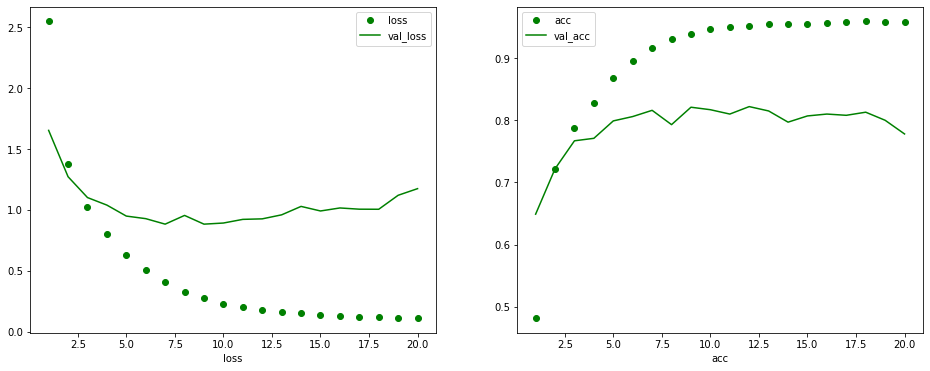

In [203]:
# 시각화
loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1,21)
y_1 = ['loss', 'acc']
y_2 = ['val_loss', 'val_acc']

plt.figure(figsize = (16, 6))
for i in range(2):
    ax = plt.subplot(1, 2, i + 1)
    plt.plot(epochs, eval(y_1[i]), 'go', label = y_1[i])
    plt.plot(epochs, eval(y_2[i]), 'g', label = y_2[i])
    plt.xlabel(y_1[i])
    plt.legend()
plt.show()  

## 실습: 주택 가격 회귀 문제

### 데이터 불러오기

In [204]:
from keras.datasets import boston_housing

In [205]:
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()
train_data.shape, test_data.shape

57344/57026 [==============================] - 0s 1us/step


((404, 13), (102, 13))

In [206]:
# 학습용 데이터, 레이블 확인
## 13개의 특성 데이터로 구성된 x, 주택 가격인 y 

train_data[0], train_labels[0]

(array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
         91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
         18.72   ]),
 15.2)

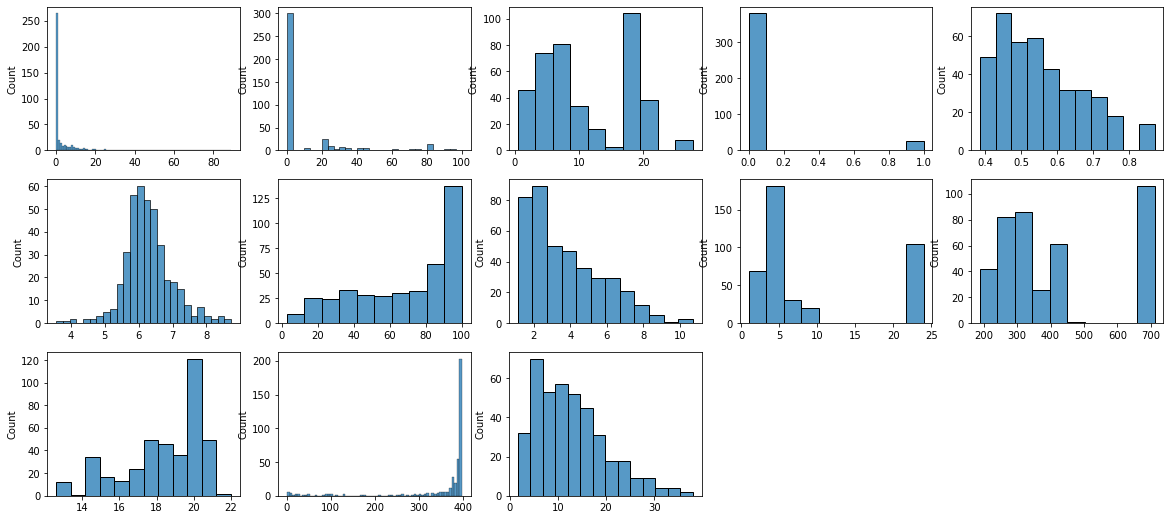

In [213]:
# 데이터 분포 확인
import seaborn as sns
import matplotlib.pyplot as plt

n = train_data.shape[1]

plt.figure(figsize = (20, 9))
for i in range(n):
    plt.subplot(3, 5, i + 1)
    sns.histplot(train_data[:, i])
plt.show()

# 대부분 정규분포를 따르지 않고 있음

<AxesSubplot:ylabel='Count'>

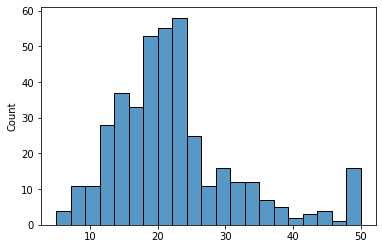

In [210]:
# 레이블 데이터 분포 확인

sns.histplot(train_labels)

### 데이터 준비

In [215]:
train_data.shape

(404, 13)

In [218]:
# 정규화
train_data = (train_data - train_data.mean(axis = 0))/ train_data.std(axis = 0)
train_data.shape

(404, 13)

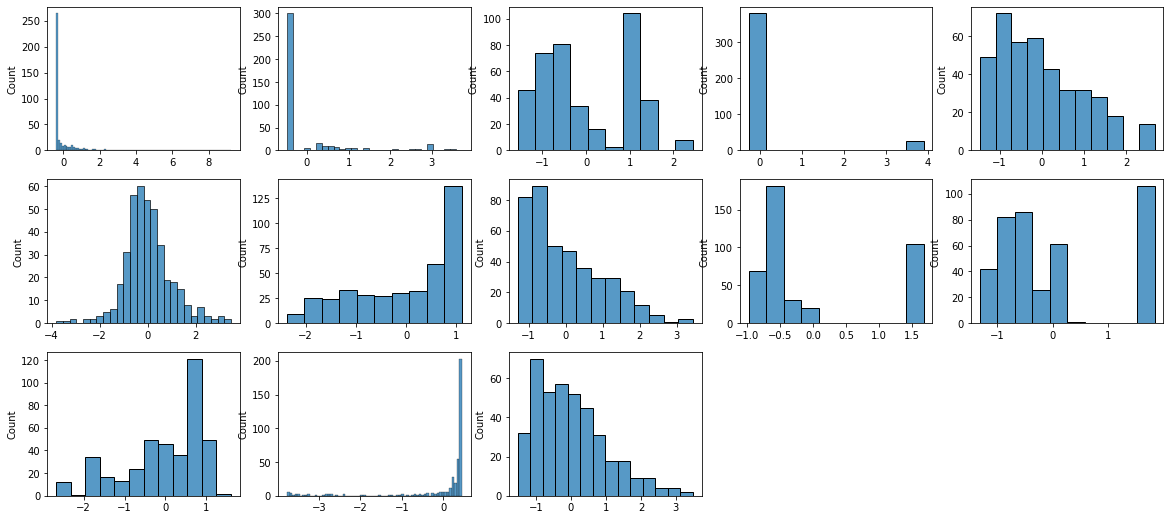

In [219]:
# 데이터 분포 확인

n = train_data.shape[1]

plt.figure(figsize = (20, 9))
for i in range(n):
    plt.subplot(3, 5, i + 1)
    sns.histplot(train_data[:, i])
plt.show()

# 정규분포를 따르지 않지만, 스케일링 되어 있음!

### 모델 구성

In [220]:
from keras import models, layers

In [227]:
# 모델 생성 및 컴파일 사용자 함수 생성

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation = 'relu', input_shape = (train_data.shape[1],)))
    model.add(layers.Dense(64, activation = 'relu'))
    model.add(layers.Dense(1))
    
    model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])
    return model

# 마지막 층은 활성함수가 존재하지 않음(선형층의 형태), 이것이 바로 전형적ㅇ니 스칼라 회귀(하나의 연속적인 값을 예측하는 회귀)

In [231]:
# 교차 검증
k = 4
num_val_samples = len(train_data)//k
num_epochs = 50
all_scores = []

for i in range(k):
    print(f'### 처리중인 폴드: {i}')
    
    # 검증 데이터
    val_data = train_data[i * (num_val_samples): (i+1) * (num_val_samples)]
    val_labels = train_labels[i * (num_val_samples): (i+1) * (num_val_samples)]
    # 훈련 데이터
    part_train_data = np.concatenate([train_data[: i * (num_val_samples)],
                                     train_data[(i+1) * (num_val_samples):]], axis = 0)
    part_labels_data = np.concatenate([train_labels[: i * (num_val_samples)],
                                      train_labels[(i+1) * (num_val_samples):]], axis = 0)
    print(part_train_data.shape, part_labels_data.shape)
    
    # 모델 생성
    model = build_model()
    
    # 훈련
    history = model.fit(part_train_data, part_labels_data,
                        epochs = num_epochs,
                        batch_size = 1, 
                        verbose = 0)
    val_mse, val_mae = model.evaluate(val_data, val_labels, verbose = 0)
    all_scores.append(val_mae)
    

### 처리중인 폴드: 0
(303, 13) (303,)
### 처리중인 폴드: 1
(303, 13) (303,)
### 처리중인 폴드: 2
(303, 13) (303,)
### 처리중인 폴드: 3
(303, 13) (303,)


In [234]:
# 교차 검증
k = 4
num_val_samples = len(train_data)//k
num_epochs = 500
all_scores = []

for i in range(k):
    print(f'### 처리중인 폴드: {i}')
    
    # 검증 데이터
    val_data = train_data[i * (num_val_samples): (i+1) * (num_val_samples)]
    val_labels = train_labels[i * (num_val_samples): (i+1) * (num_val_samples)]
    # 훈련 데이터
    part_train_data = np.concatenate([train_data[: i * (num_val_samples)],
                                     train_data[(i+1) * (num_val_samples):]], axis = 0)
    part_labels_data = np.concatenate([train_labels[: i * (num_val_samples)],
                                      train_labels[(i+1) * (num_val_samples):]], axis = 0)
    print(part_train_data.shape, part_labels_data.shape)
    
    # 모델 생성
    model = build_model()
    
    # 훈련
    history = model.fit(part_train_data, part_labels_data,
                        epochs = num_epochs,
                        batch_size = 1, 
                        verbose = 0,
                        validation_data = (val_data, val_labels))
    
    val_mae = history.history['val_mae']
    all_scores.append(val_mae)



### 처리중인 폴드: 0
(303, 13) (303,)
### 처리중인 폴드: 1
(303, 13) (303,)
### 처리중인 폴드: 2
(303, 13) (303,)
### 처리중인 폴드: 3
(303, 13) (303,)


AttributeError: 'Sequential' object has no attribute 'evalueate'

In [236]:
val_mse, val_mae = model.evaluate(test_data, test_labels, verbose = 0)    

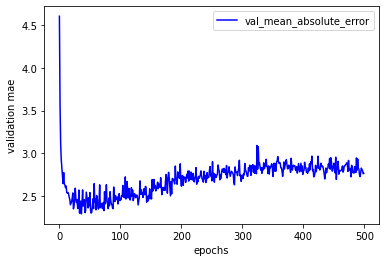

In [252]:
# 시각화
all_mae = np.mean(np.array(all_scores), axis = 0)
plt.plot(range(num_epochs), all_mae, 'b', label = 'val_mean_absolute_error')
plt.xlabel('epochs')
plt.ylabel('validation mae')
plt.legend()

- 이 그래프를 보면, 범위가 크고, 변동이 심해서 보기가 어려움
- 좀더 곡선의 변화를 보기 편하도록 각 포인트를 이전 포인트의 지수 이동 평균으로 대체하겠음

In [248]:
# 지수 이동 평균 곡선 리스트 생성 사용자함수 만들기

def smooth_curve(points, factor = 0.9):
    smoothed_points = []
    
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
            
    return smoothed_points            

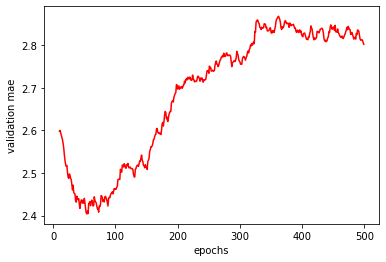

In [253]:
smoothed_points = smooth_curve(all_mae[10:], 0.9) # 곡선의 다른 부분과 스케일 차이가 많이 나는 9번째까지는 제외

plt.plot(range(10, num_epochs), smoothed_points, 'r')
plt.xlabel('epochs')
plt.ylabel('validation mae')
plt.show()

In [262]:
# 최종 모델 훈련하기
for i in range(test_data.shape[1]):
    test_data[:, i] = (test_data[:,i] - test_data[:,i].mean())/test_data[:,i].std()
print(test_data.shape)
    

# 모델 생성 및 컴파일
model = build_model()

# 훈련
model.fit(part_train_data, part_labels_data,
          epochs = 80,
          batch_size = 16,
          verbose = 0)


model.evaluate(test_data, test_labels)
#['mse', 'mae']

(102, 13)
4/4 [==============================] - 0s 2ms/step - loss: 20.5816 - mae: 2.9511


[20.58164405822754, 2.951101064682007]

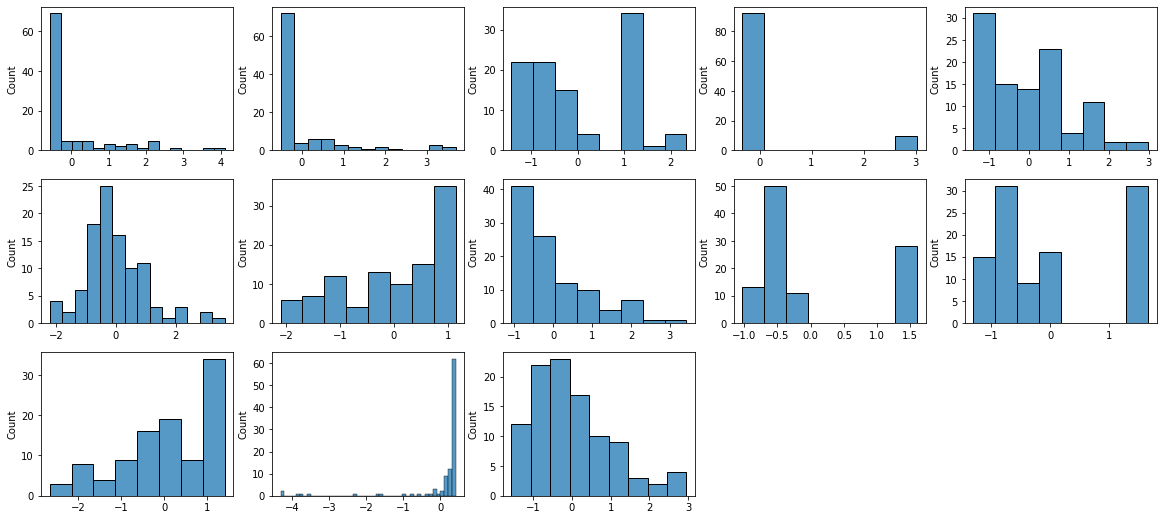

In [263]:
n = test_data.shape[1]

plt.figure(figsize = (20, 9))
for i in range(n):
    plt.subplot(3, 5, i + 1)
    sns.histplot(test_data[:, i])
plt.show()

- 평균 절대 오차 값이 2.95달러 정도로 나타남


- 여기서, 주의해야 할 점:
    - 입력 데이터 특성들의 스케일이 다르다면 조정해 주는 것이 중요함
    - 가용 데이터의 수가 적다면, k-fold 교차 검증을 실시하는 것이 신뢰할 수 있는 모델 평가 방법임
    - 가용 훈련 데이터 수가 적다면, 과대적합을 피하기 위해 은닉 층의 수를 줄인 모델이 좋음
